In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from __future__ import print_function
import sys, os, time, pickle, rospy

from enum import Enum
from torobo_driver import torobo_easy_command

import numpy as np
from scipy import signal
import scipy

from sensor_msgs.msg import Image
from cv_bridge import CvBridge, CvBridgeError
import cv2

import matplotlib.pyplot as plt
import matplotlib.patches as patches

# wrapper/helper functions
sys.path.insert(0, '/home/torobo/catkin_ws/src/torobo_robot/torobo_rnn/scripts')
sys.path.insert(0, '/home/torobo/catkin_ws/src/tutorial/PyTorch-YOLOv3')

image_topic = "/camera/color/image_raw" # Real-Robot

from torobo_rnn_utils__upd3 import *
from detect_upd import Recog, Recog2
# from adjustExtForce_v3Controller import ExtForce

plt.switch_backend('nbAgg')

bridge = CvBridge()
torobo = ToroboOperator()

""" SET DYNAMICS PARAMETERS FOR THE ***POSITION*** REGIME  """
torobo.set_control_mode(ToroboOperator.TORSO_HEAD, 'all', 'position')
torobo.set_control_mode(ToroboOperator.LEFT_ARM, 'all', 'position')
torobo.set_control_mode(ToroboOperator.RIGHT_ARM, 'all', 'position')
time.sleep(4)

set_softness_override(torobo, 30.0)
set_velocity_override(torobo, 50.0)
time.sleep(1)

[INFO] [1595825413.712649]: set_control_mode service client is called
[INFO] [1595825413.714513]: set_control_mode [['all']] is succeeded
[INFO] [1595825413.715138]: set_control_mode service client is called
[INFO] [1595825413.716481]: set_control_mode [['all']] is succeeded
[INFO] [1595825413.716772]: set_control_mode service client is called
[INFO] [1595825413.718384]: set_control_mode [['all']] is succeeded
[INFO] [1595825417.720970]: set_robot_controller_parameter service client is called
[INFO] [1595825417.722553]: set [softness_override, ['30.0'], ['all']] is succeeded
[INFO] [1595825417.722870]: set_robot_controller_parameter service client is called
[INFO] [1595825417.724058]: set [softness_override, ['30.0'], ['all']] is succeeded
[INFO] [1595825417.724317]: set_robot_controller_parameter service client is called
[INFO] [1595825417.725734]: set [softness_override, ['30.0'], ['all']] is succeeded
[INFO] [1595825417.726025]: set_robot_controller_parameter service client is calle

In [2]:
""" SET DYNAMICS PARAMETERS FOR THE ***EXTERNAL FORCE FOLLOWING*** REGIME  """
torobo.set_control_mode(ToroboOperator.LEFT_ARM, 'all', 'external_force_following');
torobo.set_control_mode(ToroboOperator.RIGHT_ARM, 'all', 'external_force_following');

[INFO] [1595825418.743888]: set_control_mode service client is called
[INFO] [1595825418.745857]: set_control_mode [['all']] is succeeded
[INFO] [1595825418.746199]: set_control_mode service client is called
[INFO] [1595825418.747600]: set_control_mode [['all']] is succeeded


In [3]:
with open('rad.pickle', 'rb') as f:
    RAD = pickle.load(f)

In [3]:
move_homepos(torobo)

with open('rad.pickle', 'rb') as f:
    RAD = pickle.load(f)
ANG = []
ts = time.time()

idx = 0
TIME = 1

left_arm_positions = RAD[idx][0:6]
right_arm_positions = RAD[idx][6:12]
torso_head_positions = RAD[idx][12:16]

torobo.move(ToroboOperator.LEFT_ARM, positions=left_arm_positions, duration=TIME)
torobo.move(ToroboOperator.RIGHT_ARM, positions=left_arm_positions, duration=TIME)
torobo.move(ToroboOperator.TORSO_HEAD, positions=torso_head_positions, duration=TIME)
rospy.sleep(TIME+0.1)
ANG.append((idx, time.time() - ts))

idx = 1
TIME = 2

left_arm_positions = RAD[idx][0:6]
right_arm_positions = RAD[idx][6:12]
torso_head_positions = RAD[idx][12:16]

torobo.move(ToroboOperator.LEFT_ARM, positions=left_arm_positions, duration=TIME)
torobo.move(ToroboOperator.RIGHT_ARM, positions=left_arm_positions, duration=TIME)
torobo.move(ToroboOperator.TORSO_HEAD, positions=torso_head_positions, duration=TIME)
rospy.sleep(TIME+0.1)
ANG.append((idx, time.time() - ts))

idx = 2
TIME = 3

left_arm_positions = RAD[idx][0:6]
right_arm_positions = RAD[idx][6:12]
torso_head_positions = RAD[idx][12:16]

torobo.move(ToroboOperator.LEFT_ARM, positions=left_arm_positions, duration=TIME)
torobo.move(ToroboOperator.RIGHT_ARM, positions=left_arm_positions, duration=TIME)
torobo.move(ToroboOperator.TORSO_HEAD, positions=torso_head_positions, duration=TIME)
rospy.sleep(TIME+0.1)
ANG.append((idx, time.time() - ts))

idx = 3
TIME = 4

left_arm_positions = RAD[idx][0:6]
right_arm_positions = RAD[idx][6:12]
torso_head_positions = RAD[idx][12:16]

torobo.move(ToroboOperator.LEFT_ARM, positions=left_arm_positions, duration=TIME)
torobo.move(ToroboOperator.RIGHT_ARM, positions=left_arm_positions, duration=TIME)
torobo.move(ToroboOperator.TORSO_HEAD, positions=torso_head_positions, duration=TIME)
rospy.sleep(TIME+0.1)
ANG.append((idx, time.time() - ts))

idx = 4
TIME = 3

left_arm_positions = RAD[idx][0:6]
right_arm_positions = RAD[idx][6:12]
torso_head_positions = RAD[idx][12:16]

torobo.move(ToroboOperator.LEFT_ARM, positions=left_arm_positions, duration=TIME)
torobo.move(ToroboOperator.RIGHT_ARM, positions=left_arm_positions, duration=TIME)
torobo.move(ToroboOperator.TORSO_HEAD, positions=torso_head_positions, duration=TIME)
rospy.sleep(TIME+0.1)
ANG.append((idx, time.time() - ts))

Moving to home position
[INFO] [1594600217.311686]: set_control_mode service client is called
[INFO] [1594600217.313970]: set_control_mode [['all']] is succeeded
[INFO] [1594600217.314550]: set_control_mode service client is called
[INFO] [1594600217.316592]: set_control_mode [['all']] is succeeded
[INFO] [1594600217.317205]: set_control_mode service client is called
[INFO] [1594600217.318684]: set_control_mode [['all']] is succeeded
[INFO] [1594600217.319208]: set_control_mode service client is called
[INFO] [1594600217.320523]: set_control_mode [['all']] is succeeded
[INFO] [1594600217.320762]: set_control_mode service client is called
[INFO] [1594600217.321970]: set_control_mode [['all']] is succeeded


In [74]:
idx = 3
TIME = 6

left_arm_positions = RAD[idx][0:6]
right_arm_positions = RAD[idx][6:12]
torso_head_positions = RAD[idx][12:16]

torobo.move(ToroboOperator.LEFT_ARM, positions=left_arm_positions, duration=TIME)
torobo.move(ToroboOperator.RIGHT_ARM, positions=left_arm_positions, duration=TIME)
torobo.move(ToroboOperator.TORSO_HEAD, positions=torso_head_positions, duration=TIME)
rospy.sleep(TIME+0.1)

In [4]:
class ExtForce(object):    

    class Mode(Enum):
        Teaching = 0
        Experiment = 1

    def runCommands(self, _commandList, _controller):
          for command in _commandList:
                torobo_easy_command.SendEasyCommandText(_controller, command)
                rospy.sleep(0.01)

    def registerParameters(self, tau_th, kp, sum_e_max, d, kr, theta_th):
            # left and right arm 
            for i in range(0,6):
                
                # constructing the commands for the left arm
                commandList = []				
                commandList.append("param " + str(i+1) + " fftauth " +       str(tau_th[i]))
                commandList.append("param " + str(i+1) + " ffkp " +          str(kp[i]))
                commandList.append("param " + str(i+1) + " ffsigmaemax " +   str(sum_e_max[i]))
                commandList.append("param " + str(i+1) + " ffdamping " +     str(d[i]))
                commandList.append("param " + str(i+1) + " ffkr " +          str(kr[i]))
                commandList.append("param " + str(i+1) + " softki " +        str(theta_th[i]))	


                # send to execution
                self.runCommands(commandList, "left_arm_controller")

            # right arm 
            for i in range(0,6):
                ii = i + 6 
                # constructing the commands for the right arm
                commandList = []
                commandList.append("param " + str(i+1) + " fftauth " +       str(tau_th[ii]))
                commandList.append("param " + str(i+1) + " ffkp " +          str(kp[ii]))
                commandList.append("param " + str(i+1) + " ffsigmaemax " +   str(sum_e_max[ii]))
                commandList.append("param " + str(i+1) + " ffdamping " +     str(d[ii]))
                commandList.append("param " + str(i+1) + " ffkr " +          str(kr[ii]))
                commandList.append("param " + str(i+1) + " softki " +        str(theta_th[ii]))	

                # send to execution
                self.runCommands(commandList, "right_arm_controller")
                            
            for i in range(0,4):
                ii = i + 12 
                # constructing the commands for the head-torso chain
                commandList = []				
                commandList.append("param " + str(i+1) + " fftauth " +       str(tau_th[ii]))
                commandList.append("param " + str(i+1) + " ffkp " +          str(kp[ii]))
                commandList.append("param " + str(i+1) + " ffsigmaemax " +   str(sum_e_max[ii]))
                commandList.append("param " + str(i+1) + " ffdamping " +     str(d[ii]))
                commandList.append("param " + str(i+1) + " ffkr " +          str(kr[ii]))
                commandList.append("param " + str(i+1) + " softki " +        str(theta_th[ii]))	

                # send to execution
                self.runCommands(commandList, "torso_head_controller")


    def __init__(self, _mode):	
        
        if _mode == ExtForce.Mode.Teaching:

            tau_th = [2.0, 2.0, 1.0, 1.0, 0.5, 0.5,            2.0, 2.0, 1.0, 1.0, 0.5, 0.5,      20.5, 20.5, 20.5, 20.5]
            kp = [0.1, 0.1, 0.05, 0.05, 0.1, 0.1,            0.1, 0.1, 0.05, 0.05, 0.1, 0.1,        0.0,0.0,0.0,0.0]
            sum_e_max = [200.0,200.0,100.0,100.0,50.0,50.0,  200.0,200.0,100.0,100.0,50.0,50.0,   200.0,200.0,50.0,50.0]
            d = [0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9]
            # kr = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
            kr = [0.1]*16
            kr[5] = 0.3
            kr[11] = 0.3
            theta_th = [1.57,1.57,1.57,1.57,1.57,1.57,1.57,1.57,1.57,1.57,1.57,1.57,1.57,1.57,1.57,1.57]
            theta_th = [i*1.63 for i in theta_th]

            self.registerParameters( tau_th, kp, sum_e_max, d, kr, theta_th)


        elif _mode == ExtForce.Mode.Experiment:

            tau_th = [12.0,12.0,5.0,5.0,1.5,1.5,12.0,12.0,5.0,5.0,1.5,1.5,200.0,200.0,200.0,200.0]
            kp = [0.025,0.025,0.05,0.05,0.1,0.1,0.025,0.025,0.05,0.05,0.1,0.1,0.025,0.025,0.05,0.05]
            sum_e_max = [200.0,200.0,100.0,100.0,50.0,50.0,200.0,200.0,100.0,100.0,50.0,50.0,200.0,200.0,50.0,50.0]
            d = [0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9]
            kr = [0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8]
            # kr = [0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9]
            theta_th = [1.57,1.57,1.57,1.57,1.57,1.57,1.57,1.57,1.57,1.57,1.57,1.57,1.57,1.57,1.57,1.57]
            theta_th = [i*1.63 for i in theta_th]

            self.registerParameters( tau_th, kp, sum_e_max, d, kr, theta_th)

with HiddenPrints():
    set_external_force_following_online_trajectory_control(torobo)
#     set_position_control(torobo)
    torobo.set_control_mode(ToroboOperator.TORSO_HEAD, 'all', 'position')
print('SETTING MODE: set_external_force_following_online_trajectory_control')
with HiddenPrints():
    time.sleep(1)
    ExtForce(ExtForce.Mode.Teaching)
    time.sleep(1)
print('SETTING DYNAMIC PARAMETERS')

with HiddenPrints():
    set_softness_override(torobo, 10.0)
    set_velocity_override(torobo, 10.0)
print('OVERRIDES SET')

SETTING MODE: set_external_force_following_online_trajectory_control
SETTING DYNAMIC PARAMETERS
OVERRIDES SET


In [5]:
# MOVE HOME

idx = 4
TIME = 6

with open('rad.pickle', 'rb') as f:
    RAD = pickle.load(f)
    
# """ SET DYNAMICS PARAMETERS FOR THE ***POSITION*** REGIME  """
# with HiddenPrints():
#     torobo.set_control_mode(ToroboOperator.TORSO_HEAD, 'all', 'position')
#     torobo.set_control_mode(ToroboOperator.LEFT_ARM, 'all', 'position')
#     torobo.set_control_mode(ToroboOperator.RIGHT_ARM, 'all', 'position')
#     time.sleep(1)

#     set_softness_override(torobo, 30.0)
#     set_velocity_override(torobo, 10.0)
#     time.sleep(1)

left_arm_positions = RAD[idx][0:6]
right_arm_positions = RAD[idx][6:12]
torso_head_positions = RAD[idx][12:16]

torobo.move(ToroboOperator.LEFT_ARM, positions=left_arm_positions, duration=TIME)
torobo.move(ToroboOperator.RIGHT_ARM, positions=left_arm_positions, duration=TIME)
torobo.move(ToroboOperator.TORSO_HEAD, positions=torso_head_positions, duration=TIME)
rospy.sleep(TIME+0.1)

In [8]:
# # from adjustExtForce_v3Controller import ExtForce
# with HiddenPrints():
#     set_external_force_following_online_trajectory_control(torobo)
# #     set_position_control(torobo)
#     torobo.set_control_mode(ToroboOperator.TORSO_HEAD, 'all', 'position')
# print('SETTING MODE: set_external_force_following_online_trajectory_control')
# with HiddenPrints():
#     time.sleep(1)
#     ExtForce(ExtForce.Mode.Experiment)
#     time.sleep(1)
# print('SETTING DYNAMIC PARAMETERS')

# with HiddenPrints():
#     set_softness_override(torobo, 10.0)
#     set_velocity_override(torobo, 10.0)
# print('OVERRIDES SET')

SETTING MODE: set_external_force_following_online_trajectory_control
SETTING DYNAMIC PARAMETERS
OVERRIDES SET


In [32]:
# with HiddenPrints():
#     torobo.set_control_mode(ToroboOperator.TORSO_HEAD, 'all', 'position')
#     torobo.set_control_mode(ToroboOperator.LEFT_ARM, 'all', 'position')
#     torobo.set_control_mode(ToroboOperator.RIGHT_ARM, 'all', 'position')
#     time.sleep(1)

0.00230598449707


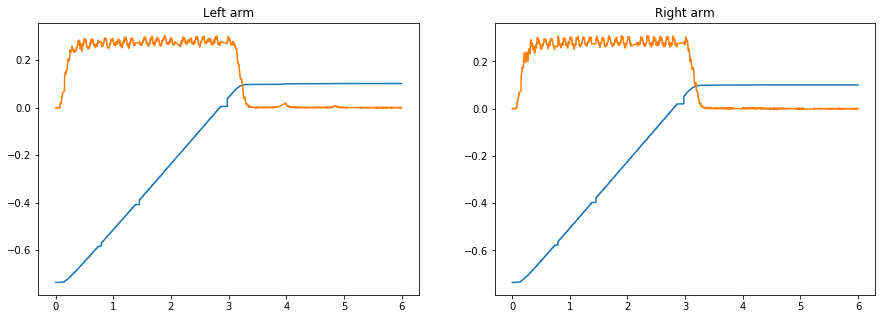

In [9]:
# %matplotlib inline

# idx = 4
# TIME = 6

# arm_v = [0.0]*6 # the larger the value, the smaller the velocity
# arm_g = [0.0]*6 # the larger the value, the smaller the velocity


# with open('rad.pickle', 'rb') as f:
#     RAD = pickle.load(f)
    
# left_arm_positions = RAD[idx][0:6]
# left_arm_positions[5] = 0.1
# right_arm_positions = RAD[idx][6:12]
# torso_head_positions = RAD[idx][12:16]

# POS, VEL, T = [], [], []
# t = time.time()

# torobo.move_joints (left_arm_joint_names=[torobo._ToroboOperator__JOINT_NAME_LIST[ToroboOperator.LEFT_ARM][i] for i in range(6)],
#                     left_arm_positions=left_arm_positions, 
#                     left_arm_velocities=arm_v,
#                     left_arm_accelerations=arm_g,
                    
#                     right_arm_joint_names=[torobo._ToroboOperator__JOINT_NAME_LIST[ToroboOperator.RIGHT_ARM][i] for i in range(6)],
#                     right_arm_positions=left_arm_positions,
#                     right_arm_velocities=None,
#                     right_arm_accelerations=None,
                    
#                     torso_head_joint_names=[torobo._ToroboOperator__JOINT_NAME_LIST[ToroboOperator.TORSO_HEAD][i] for i in range(4)],
#                     torso_head_positions=torso_head_positions,
#                     torso_head_velocities=None,
#                     torso_head_accelerations=None,
                    
#                     duration=TIME)
# print(time.time()-t)

# while (time.time()-t) < TIME:
#     T.append(time.time()-t)
#     pos, vel = get_cur_joints(torobo)
#     POS.append(pos)
#     VEL.append(vel)

# pos = np.stack(POS)
# vel = np.stack(VEL)

# plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
# plt.title('Left arm')
# plt.plot(T, np.radians(pos[:, 5]))
# plt.plot(T, np.radians(vel[:, 5]))

# plt.subplot(1,2,2)
# plt.title('Right arm')
# plt.plot(T, np.radians(pos[:, 11]))
# plt.plot(T, np.radians(vel[:, 11]))

In [6]:
# fname = '/home/torobo/catkin_ws/src/tutorial/src/joints/DS_no track_3 ds/DS_no tracking 3 ds.dat'
fname = 'DS.dat'


with open(fname, 'rb') as f:
    dat = pickle.load(f)
    
IMG = dat['img']
joints = dat['joints']
times = dat['t']

start_idx = np.argmin(np.abs(dat['t']-0.0))
stop_idx = np.argmin(np.abs(dat['t']-194.12))

IMG = dat['img'][start_idx:stop_idx, :,:,:]
joints = dat['joints'][start_idx:stop_idx, :]
times = dat['t'][start_idx:stop_idx]



joints /= 4.0

img = np.stack(IMG)
img = img.transpose(0,3,1,2) #B x C x H x W
img = img[:,0,:,:]           # select only the red channel
img = img[:,None, :,:]       # squeeze the tensor
visual_input = torch.tensor(img, dtype=torch.float).cuda()

# prepare visual targets (they should be the same as the inputs only one step ahead)
visual_target = np.roll(img, -1, axis=0)
visual_target = torch.tensor(visual_target, dtype=torch.float).cuda()

motor_input = torch.tensor(joints, dtype=torch.float).cuda()

target_joints = np.roll(joints, -1, axis=0)
motor_target = torch.tensor(target_joints, dtype=torch.float).cuda()


In [7]:
from RNN import RNN, vaeRNN


input_size  = 46
hidden_size = 46
output_size = 46
cell_type = 'GRU'

criterion = nn.MSELoss()

rnn = RNN(cell_type, input_size, hidden_size, output_size).cuda() #noVAE
# rnn = vaeRNN(cell_type, input_size, hidden_size, output_size, False).cuda()

# rnn.load_state_dict(torch.load('checkpoint_ww'))
# rnn.load_state_dict(torch.load('checkpoint_ss'))
rnn.load_state_dict(torch.load('checkpoint_overnight_90_10')) # BEST
# rnn.load_state_dict(torch.load('checkpoint_vaeRNN_1K_iter_noBIG_mse'))
# rnn.load_state_dict(torch.load('checkpoint_vaeRNN_400K_iter_noBIG_mse'))

# rnn.load_state_dict(torch.load('checkpoint'))



<All keys matched successfully>

In [8]:
if not 'imagebuff' in locals():
    imagebuff = 0
    def image_callback(msg):
        global imagebuff
        imagebuff = bridge.imgmsg_to_cv2(msg, "rgb8") 
    rospy.Subscriber("/camera/color/image_raw", Image, image_callback)

cv2.namedWindow('I see')
cv2.setWindowProperty("I see", cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)

while True:
    cv2.imshow('I see', cv2.cvtColor(imagebuff, cv2.COLOR_RGB2BGR))
    k = cv2.waitKey(3) & 0XFF
    if k== 27 :
        cv2.destroyWindow('I see')
        break

In [9]:
""" New steps are based on previously predicted ones """

tracking = True
device = 'cuda'

cv2.namedWindow('I see')
cv2.setWindowProperty("I see", cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)

hidden = rnn.initHidden(device)
starting_point = 0


DUR = 0.15


x = cv2.resize(np.copy(imagebuff), (64, 64), interpolation = cv2.INTER_AREA)
y = torch.tensor(x[:,:,0], dtype=torch.float).view(1,1,64,64).cuda()

# for plain RNN
visual_output, motor_output, hidden = rnn(y, 
                                  motor_input[starting_point,:].unsqueeze_(0),
                                  hidden)

# for vaeRNN
# visual_output, motor_output, hidden, mu, logsig = rnn(y, 
#                                                       motor_input[starting_point,:].unsqueeze_(0), 
#                                                       hidden, True)


OUT = motor_output.cpu().detach().numpy() * 4.0

left_arm_positions = OUT.reshape(1, 16)[0, 0:6]
right_arm_positions = OUT.reshape(1, 16)[0, 6:12]
torso_head_positions = OUT.reshape(1, 16)[0, 12:16]
torso_head_positions[0:2] = RAD[4][12:14]

torobo.move(ToroboOperator.LEFT_ARM, positions=left_arm_positions, duration=DUR+0.01)
torobo.move(ToroboOperator.RIGHT_ARM, positions=left_arm_positions, duration=DUR+0.01)
if tracking:
    torobo.move(ToroboOperator.TORSO_HEAD, positions=torso_head_positions, duration=DUR+0.01)
rospy.sleep(DUR)

OOO = []
for i in range(1, visual_input.shape[0]):
      
    im1 = cv2.resize(visual_input[i,:,:].squeeze().cpu().detach().numpy(), (350, 350), interpolation = cv2.INTER_AREA)
    im1 = cv2.normalize(im1, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    
    x = cv2.resize(np.copy(imagebuff), (64, 64), interpolation = cv2.INTER_AREA)
    y = torch.tensor(x[:,:,0], dtype=torch.float).view(1,1,64,64).cuda()
    
#     visual_output, motor_output, hidden = rnn(y, 
#                                   motor_output.view(1,-1),
#                                   hidden)
    pos, vel = get_cur_joints(torobo)
    mixed_motor = (0.3 * torch.tensor(np.radians(pos)/4.0, dtype=torch.float).cuda().view(1,-1) +
                   0.7 * motor_output.view(1, -1))

    visual_output, motor_output, hidden = rnn(y, mixed_motor, hidden)
    
#     visual_output, motor_output, hidden, mu, logsig = rnn(y, 
#                                   motor_output.view(1,-1),
#                                   hidden, True)
    
    im2 = cv2.resize(visual_output.squeeze().cpu().detach().numpy(), (350, 350), interpolation = cv2.INTER_AREA)
    im2 = cv2.normalize(im2, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    
    im3 = cv2.resize(imagebuff, (350, 350), interpolation = cv2.INTER_AREA)
    im3 = cv2.normalize(im3, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    
    final_frame = cv2.hconcat((im3[:,:,2], im2))
    cv2.imshow('I see', final_frame)

    k = cv2.waitKey(3) & 0XFF
    if k== 27 :
        cv2.destroyWindow('I see')
        break
    i += 1
        
    OUT = motor_output.cpu().detach().numpy() * 4.0

    left_arm_positions = OUT.reshape(1, 16)[0, 0:6]
    right_arm_positions = OUT.reshape(1, 16)[0, 6:12]
    if tracking:
        torso_head_positions = OUT.reshape(1, 16)[0, 12:16]              # !!!!!!!!!!!!!!!!!!!!!!!!!!
        torso_head_positions[0:2] = RAD[4][12:14]

    torobo.move(ToroboOperator.LEFT_ARM, positions=left_arm_positions, duration=DUR+0.01)
    torobo.move(ToroboOperator.RIGHT_ARM, positions=left_arm_positions, duration=DUR+0.01)
    if tracking:
        torobo.move(ToroboOperator.TORSO_HEAD, positions=torso_head_positions, duration=DUR+0.01)
    rospy.sleep(DUR)
    
    
    OOO.append((np.radians(pos), motor_output.cpu().detach().numpy() * 4.0))
    
cv2.destroyWindow('I see')


error: /tmp/binarydeb/ros-kinetic-opencv3-3.3.1/modules/highgui/src/window_QT.cpp:525: error: (-27) NULL guiReceiver (please create a window) in function cvDestroyWindow


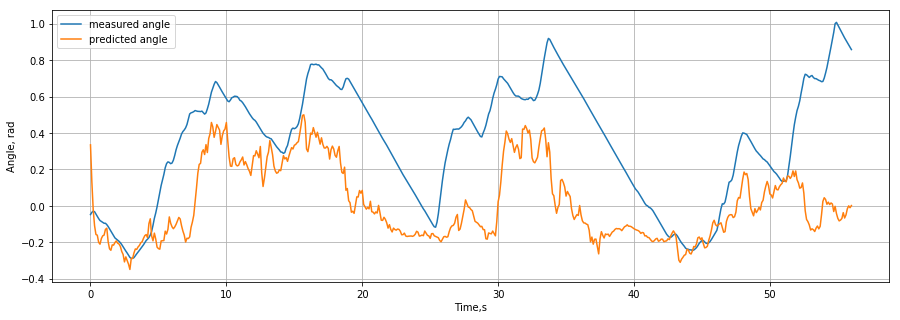

In [66]:
%matplotlib inline
joint = 0


gt = [line[0][joint] for line in OOO]
pred = [line[1][joint] for line in OOO]

t = np.arange(0, len(OOO)/10.0, 0.1)
plt.figure(figsize=(15,5))
plt.plot(t, gt, label='measured angle')
plt.plot(t, pred, label='predicted angle')
plt.grid()
plt.xlabel('Time,s')
plt.ylabel('Angle, rad')
plt.legend()




In [21]:
DUR = 4
torso_head_positions = np.array([0, np.radians(40), 0, np.radians(20)])
torobo.move(ToroboOperator.TORSO_HEAD, positions=torso_head_positions, duration=DUR+0.05)

In [22]:
""" New steps NOT based on previously predicted ones """

hidden = rnn.initHidden()
starting_point = 0
DUR = 0.2


for i in range(visual_input.shape[0]):
    
    visual_output, motor_output, hidden = rnn(visual_input[i,:,:,].unsqueeze_(0), 
                                  motor_input[i,:].view(1,-1),
                                  hidden)
    
    OUT = motor_output.cpu().detach().numpy() * 4.0

    left_arm_positions = OUT[0:6]
    right_arm_positions = OUT[6:12]
    torso_head_positions = OUT[12:16]

    torobo.move(ToroboOperator.LEFT_ARM, positions=left_arm_positions, duration=DUR+0.05)
    torobo.move(ToroboOperator.RIGHT_ARM, positions=left_arm_positions, duration=DUR+0.05)
    torobo.move(ToroboOperator.TORSO_HEAD, positions=torso_head_positions, duration=DUR+0.05)
    rospy.sleep(DUR)

TypeError: initHidden() takes exactly 2 arguments (1 given)